# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [182]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [183]:
# create dataframe to hold response
citydf = pd.DataFrame(cities)
citydf.columns=['City']
citydf[Cloudiness] = ""
citydf[Country] = ""
citydf[Date] = ""
citydf[Humidity] = ""
citydf[Lat] = ""
citydf[Lon] = ""
citydf[MaxTemp] = ""
citydf[WindSpeed] = ""

# setup URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for index, row in citydf.iterrows():
    response = requests.get(query_url + row['City']).json()
    try:
        print(f"Processing Record: {index} : {row['City']}")
        citydf.loc[index, 'City'] = response['name']
        citydf.loc[index, 'Cloudiness'] = response['clouds']['all']
        citydf.loc[index, 'Country'] = response['sys']['country']
        citydf.loc[index, 'Date'] = response['dt']
        citydf.loc[index, 'Humidity'] = response['main']['humidity']
        citydf.loc[index, 'Lat'] = response['coord']['lat']
        citydf.loc[index, 'Lon'] = response['coord']['lon']
        citydf.loc[index, 'MaxTemp'] = response['main']['temp_max']
        citydf.loc[index, 'WindSpeed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print(f"Processing Record: {index} : {row['City']} record not found, skip.")


Processing Record: 0 : punta arenas
Processing Record: 1 : porto santo
Processing Record: 1 : porto santo record not found, skip.
Processing Record: 2 : illoqqortoormiut
Processing Record: 2 : illoqqortoormiut record not found, skip.
Processing Record: 3 : new norfolk
Processing Record: 4 : waipawa
Processing Record: 5 : cape town
Processing Record: 6 : cabo san lucas
Processing Record: 7 : umea
Processing Record: 8 : umzimvubu
Processing Record: 8 : umzimvubu record not found, skip.
Processing Record: 9 : anloga
Processing Record: 10 : vaitupu
Processing Record: 10 : vaitupu record not found, skip.
Processing Record: 11 : arraial do cabo
Processing Record: 12 : cheuskiny
Processing Record: 12 : cheuskiny record not found, skip.
Processing Record: 13 : narsaq
Processing Record: 14 : hasaki
Processing Record: 15 : isangel
Processing Record: 16 : tasiilaq
Processing Record: 17 : muromtsevo
Processing Record: 18 : carnarvon
Processing Record: 19 : yellowknife
Processing Record: 20 : sredn

Processing Record: 198 : barentsburg
Processing Record: 198 : barentsburg record not found, skip.
Processing Record: 199 : lincoln
Processing Record: 200 : avera
Processing Record: 201 : kambove
Processing Record: 202 : kabanjahe
Processing Record: 203 : manbij
Processing Record: 204 : taoudenni
Processing Record: 205 : komsomolskiy
Processing Record: 206 : baijiantan
Processing Record: 207 : metro
Processing Record: 208 : laguna
Processing Record: 209 : aquiraz
Processing Record: 210 : mulchen
Processing Record: 211 : chuy
Processing Record: 212 : marzuq
Processing Record: 213 : tiksi
Processing Record: 214 : kodiak
Processing Record: 215 : creel
Processing Record: 216 : sao joao da barra
Processing Record: 217 : havoysund
Processing Record: 218 : richards bay
Processing Record: 219 : lata
Processing Record: 220 : baykit
Processing Record: 221 : tutoia
Processing Record: 222 : ugoofaaru
Processing Record: 223 : aklavik
Processing Record: 224 : beloomut
Processing Record: 225 : uusikau

Processing Record: 404 : talnakh
Processing Record: 405 : westport
Processing Record: 406 : klaksvik
Processing Record: 407 : zhitikara
Processing Record: 407 : zhitikara record not found, skip.
Processing Record: 408 : hamilton
Processing Record: 409 : awbari
Processing Record: 410 : chokwe
Processing Record: 410 : chokwe record not found, skip.
Processing Record: 411 : coihaique
Processing Record: 412 : necochea
Processing Record: 413 : boysun
Processing Record: 414 : humaita
Processing Record: 415 : tabiauea
Processing Record: 415 : tabiauea record not found, skip.
Processing Record: 416 : mlonggo
Processing Record: 417 : barcelos
Processing Record: 418 : orocue
Processing Record: 419 : bud
Processing Record: 420 : nemuro
Processing Record: 421 : bandarbeyla
Processing Record: 422 : dipolog
Processing Record: 423 : conakry
Processing Record: 424 : general pico
Processing Record: 425 : amapa
Processing Record: 426 : clearlake
Processing Record: 427 : lasa
Processing Record: 428 : cab

Processing Record: 606 : enumclaw
Processing Record: 607 : suntar
Processing Record: 608 : kargasok
Processing Record: 609 : axim
Processing Record: 610 : hovd
Processing Record: 611 : audru
Processing Record: 612 : olutanga
Processing Record: 613 : tirodi
Processing Record: 614 : adrar
Processing Record: 615 : bukachacha
Processing Record: 616 : pringsewu
Processing Record: 617 : trinidad
Processing Record: 618 : rosetta


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [184]:
citydf.to_csv(output_data_file, index=False, header=True)
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,MaxTemp,WindSpeed
0,Punta Arenas,20.0,CL,1.553750e+09,100.0,-53.16,-70.91,1.00,2.10
1,porto santo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,New Norfolk,0.0,AU,1.553750e+09,28.0,-42.78,147.06,24.44,5.70
4,Waipawa,64.0,NZ,1.553751e+09,74.0,-39.94,176.59,15.56,0.89


In [185]:
# count the number of records
citydf.count()

#clean up data.  drop NaN
cityData = citydf.dropna(how = 'any') 

In [186]:
# count the number of records
cityData.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lon           550
MaxTemp       550
WindSpeed     550
dtype: int64

In [188]:
#view clean data
cityData.head()
#cityData.columns

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,MaxTemp,WindSpeed
0,Punta Arenas,20.0,CL,1.553750e+09,100.0,-53.16,-70.91,1.00,2.10
3,New Norfolk,0.0,AU,1.553750e+09,28.0,-42.78,147.06,24.44,5.70
4,Waipawa,64.0,NZ,1.553751e+09,74.0,-39.94,176.59,15.56,0.89
5,Cape Town,75.0,ZA,1.553751e+09,93.0,-33.93,18.42,17.22,1.50
6,Cabo San Lucas,40.0,MX,1.553750e+09,98.0,22.89,-109.91,22.00,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

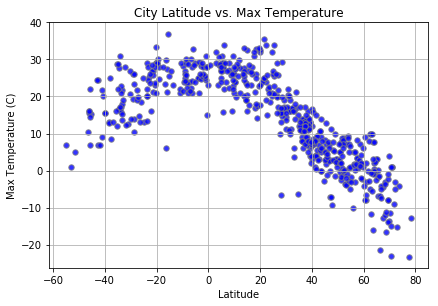

In [193]:
#Find the axis to plot
x_axis = cityData["Lat"]
y_axis = cityData["MaxTemp"]
plt.scatter(x_axis, y_axis, marker="o", 
            color='Blue' ,s=30,alpha=0.8,edgecolors ='Gray' ,linewidths = None )

# Incorporate the other graph properties

plt.grid()
plt.tight_layout()

# Create a legend

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save Figure
plt.savefig("../output_data/MaxTemp.png", pad_inches = 3, bbox_inches='tight')

#### Latitude vs. Humidity Plot

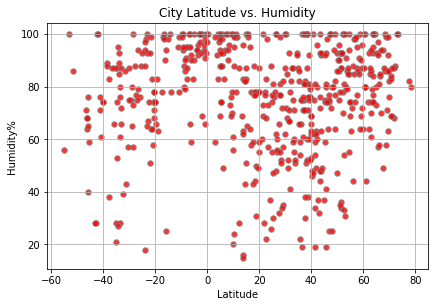

In [190]:
#Find the axis to plot
x_axis = cityData["Lat"]
y_axis = cityData['Humidity']
plt.scatter(x_axis, y_axis, marker="o", 
            color='Red' ,s=30,alpha=0.8,edgecolors ='Gray' ,linewidths = None )

# Incorporate the other graph properties

plt.grid()
plt.tight_layout()

# Create a legend

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")

# Save Figure
plt.savefig("../output_data/Humidity.png", pad_inches = 3, bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

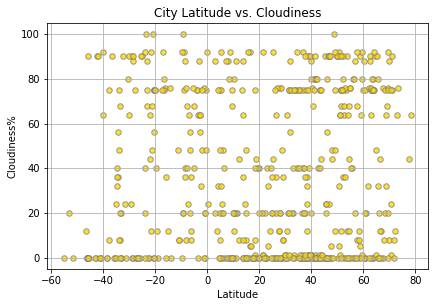

In [191]:
#Find the axis to plot
x_axis = cityData["Lat"]
y_axis = cityData['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", 
            color='Gold' ,s=30,alpha=0.8,edgecolors ='Gray' ,linewidths = None )

# Incorporate the other graph properties

plt.grid()
plt.tight_layout()

# Create a legend

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save Figure
plt.savefig("../output_data/Cloudiness.png", pad_inches = 3, bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

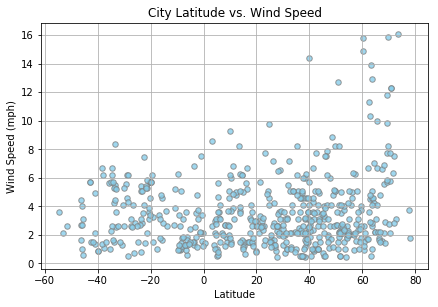

In [192]:
#Find the axis to plot
x_axis = cityData["Lat"]
y_axis = cityData['WindSpeed']
plt.scatter(x_axis, y_axis, marker="o", 
            color='SkyBlue' ,s=30,alpha=0.8,edgecolors ='Gray' ,linewidths = None )

# Incorporate the other graph properties

plt.grid()
plt.tight_layout()

# Create a legend

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("../output_data/WindSpeed.png", pad_inches = 3, bbox_inches='tight')

Analysis
1.  Max temperature increases for cities that are closest to the equator and gradually decreases the further the city
2.  There seem to be no correlation between humidty and latitude; most cities have 60% or higher humidity
3.  Most cities are below 6 MPH wind speed; however, there are cities located north of the equator with wind speed up to 16MPH